DAY 1 – Load Dataset & Explore Images

Data shape: (1797, 64)
Target shape: (1797,)


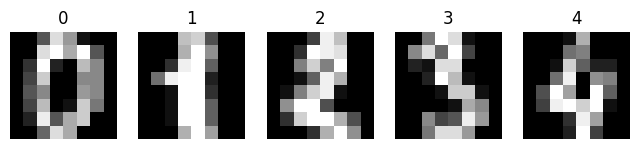

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

print("Data shape:", digits.data.shape)
print("Target shape:", digits.target.shape)

# Visualize first 5 images
plt.figure(figsize=(8,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()


DAY 2 – Understand Features & Target

In [2]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target

df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


DAY 3 – Data Visualization & Distribution

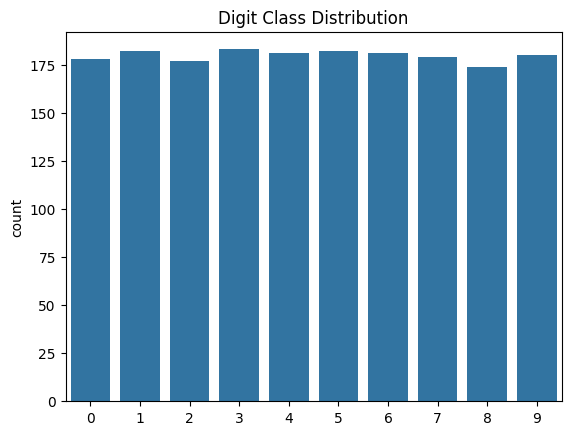

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=digits.target)
plt.title("Digit Class Distribution")
plt.show()


DAY 4 – Train/Test Split & Scaling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


DAY 5 – Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9722222222222222


DAY 6 – Confusion Matrix & Classification Report

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))


Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                   

DAY 7 – Visualize Correct & Incorrect Predictions

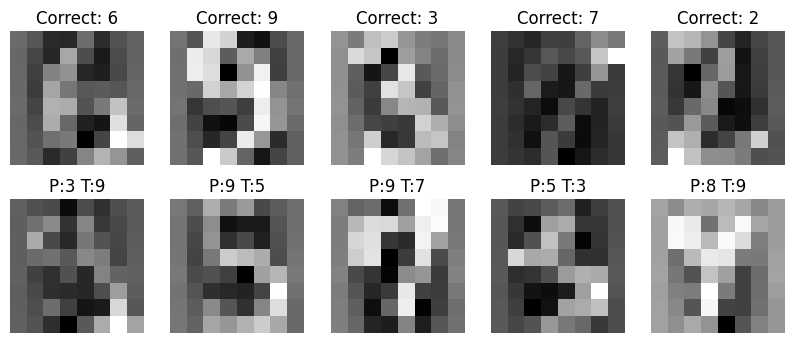

In [7]:
import numpy as np

correct_idx = np.where(pred == y_test)[0][:5]
wrong_idx = np.where(pred != y_test)[0][:5]

plt.figure(figsize=(10,4))

for i, idx in enumerate(correct_idx):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(8,8), cmap='gray')
    plt.title(f"Correct: {pred[idx]}")
    plt.axis('off')

for i, idx in enumerate(wrong_idx):
    plt.subplot(2,5,i+6)
    plt.imshow(X_test[idx].reshape(8,8), cmap='gray')
    plt.title(f"P:{pred[idx]} T:{y_test[idx]}")
    plt.axis('off')

plt.show()
